Name: Srinivas Jakkula

I have provided explanation of each cell in the form or comments or some kind of description in the above or below cells for all the code

Initial Objectives give as per project proposal.
NOTE: All objectives are met in this project and work items are in different order compthis scope

I want to showcase the daily covid-19 vaccination progress across all countries for the data available in a plot for easy understanding of trends for all countries using line plots. --- Done

I want to provide a chart with the details of total vaccinations done for each country for all the data available and also provide details about how many people in each country are vaccinated per million to see how fast the vaccination is progressing across countries ---Done

I want to find if all the vaccinations available are used on the same day by comparing vaccination available vs people vaccinated using fields “total_vaccinations” and “people_vaccinated” per day.  ---- Done

 I want to find what vaccines are used in each country and also want to find which vaccine is more distributed across the world to see the production capability of the companies for these vaccines. ---Done
    

In [194]:
# Importing the required modules for COVID-19 vaccination Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data file and creating dataframe

In [195]:
# dataset downloaded from kaggle (link for the dataset is: https://www.kaggle.com/gpreda/covid-world-vaccination-progress)
# Reading the dataset to a data frame
vaccine_df = pd.read_csv("country_vaccinations.csv")

In [196]:
# Displaying some basic information about the data frame like, shape, size, head and tail
# And also describing the data frame
print(vaccine_df.shape)
print(vaccine_df.size)
print(vaccine_df.head())
print(vaccine_df.tail())
vaccine_df.describe()

(7488, 15)
112320
       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.625000e+03,4.118000e+03,2.794000e+03,3.891000e+03,7.301000e+03,4625.000000,4118.000000,2794.000000,7301.000000
mean,2.418319e+06,1.951982e+06,8.203957e+05,8.864745e+04,5.912389e+04,9.534216,7.329687,3.423400,2685.284892
std,8.640768e+06,6.366775e+06,3.309203e+06,2.749977e+05,2.019365e+05,17.181920,11.716103,7.385624,4211.138349
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.766000e+04,3.482925e+04,1.810400e+04,2.748000e+03,9.850000e+02,0.730000,0.730000,0.370000,362.000000
50%,2.572910e+05,2.368320e+05,1.013010e+05,1.370000e+04,6.041000e+03,3.520000,3.070000,1.390000,1267.000000
75%,1.231716e+06,9.674650e+05,4.687408e+05,5.726450e+04,2.758600e+04,10.210000,8.050000,3.030000,3093.000000
max,1.214415e+08,7.936722e+07,4.303682e+07,4.575496e+06,2.541597e+06,155.330000,89.160000,66.170000,54264.000000


In [197]:
# Displaying some information of the data frame

vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7488 non-null   object 
 1   iso_code                             7488 non-null   object 
 2   date                                 7488 non-null   object 
 3   total_vaccinations                   4625 non-null   float64
 4   people_vaccinated                    4118 non-null   float64
 5   people_fully_vaccinated              2794 non-null   float64
 6   daily_vaccinations_raw               3891 non-null   float64
 7   daily_vaccinations                   7301 non-null   float64
 8   total_vaccinations_per_hundred       4625 non-null   float64
 9   people_vaccinated_per_hundred        4118 non-null   float64
 10  people_fully_vaccinated_per_hundred  2794 non-null   float64
 11  daily_vaccinations_per_million

In [198]:
# Printing column names in the data frame
print(vaccine_df.columns)
# Printing count of columns 
print(len(vaccine_df.columns))

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')
15


In [199]:
# Printing the unique country names
CountryList = vaccine_df['country'].unique()
print(CountryList)
print(f"Number of conutries: {len(CountryList)}")

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bermuda' 'Bolivia' 'Brazil' 'Bulgaria' 'Cambodia' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia'
 'Faeroe Islands' 'Falkland Islands' 'Finland' 'France' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guernsey'
 'Guinea' 'Guyana' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Laos' 'Latvia'
 'Lebanon' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao' 'Malawi'
 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Mexico' 'Moldova' 'Monaco'
 'Mongolia' 'Mon

In [200]:
#Check for missing data from each column
vaccine_df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     2863
people_vaccinated                      3370
people_fully_vaccinated                4694
daily_vaccinations_raw                 3597
daily_vaccinations                      187
total_vaccinations_per_hundred         2863
people_vaccinated_per_hundred          3370
people_fully_vaccinated_per_hundred    4694
daily_vaccinations_per_million          187
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Based on above data, we see that there are some NaN values in the some of the columns.

In [201]:
# Finding th vacines used in each country
country_by_vaccine = pd.DataFrame(vaccine_df.groupby('country').vaccines.unique())
print(country_by_vaccine)

                                          vaccines
country                                           
Afghanistan                   [Oxford/AstraZeneca]
Albania                          [Pfizer/BioNTech]
Algeria                                [Sputnik V]
Andorra                          [Pfizer/BioNTech]
Angola                        [Oxford/AstraZeneca]
...                                            ...
Uruguay                 [Pfizer/BioNTech, Sinovac]
Venezuela                              [Sputnik V]
Vietnam                       [Oxford/AstraZeneca]
Wales        [Oxford/AstraZeneca, Pfizer/BioNTech]
Zimbabwe                       [Sinopharm/Beijing]

[150 rows x 1 columns]


In [202]:
# Finding the unique columns
# Finding the number of unique values in each column.

vaccine_df.nunique()

country                                 150
iso_code                                150
date                                     98
total_vaccinations                     4435
people_vaccinated                      3952
people_fully_vaccinated                2666
daily_vaccinations_raw                 3604
daily_vaccinations                     5154
total_vaccinations_per_hundred         1831
people_vaccinated_per_hundred          1546
people_fully_vaccinated_per_hundred     753
daily_vaccinations_per_million         3454
vaccines                                 25
source_name                              91
source_website                          145
dtype: int64

In [203]:
#Dropping columns that are not required, here source_name and source_website
vaccine_df.drop(['source_name', 'source_website'], axis = 1, inplace = True)
vaccine_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


In [204]:
# Examine the names and the count of each country. 

vaccine_df['country'].value_counts()

United Kingdom       97
Northern Ireland     97
Scotland             97
England              97
Wales                97
                     ..
Malawi                3
Equatorial Guinea     1
Guinea                1
Laos                  1
Bahamas               1
Name: country, Length: 150, dtype: int64

In [205]:
# Based on this data, it seems like UK data is given 5 time with names United Kingdom, Northern Ireland
# Scotland, England, and Wales


In [206]:
#In country column, England,Scotland,Northern Ireland and Wales are part of UK, let us drop rows except UK
index_names = vaccine_df[vaccine_df.country.isin(['England', 'Scotland', 'Wales', 'Northern Ireland'])].index
vaccine_df.drop(index_names, inplace = True)
print(vaccine_df.head())
vaccine_df.shape

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

(7100, 13)

In [207]:
# Examine the names and the count of each country. 

vaccine_df['country'].value_counts()

Canada               97
United Kingdom       97
Russia               96
China                96
Israel               92
                     ..
Malawi                3
Equatorial Guinea     1
Guinea                1
Laos                  1
Bahamas               1
Name: country, Length: 146, dtype: int64

In [208]:
# After droping above, showing the details number of unique values in column
vaccine_df.nunique()

country                                 146
iso_code                                146
date                                     98
total_vaccinations                     4145
people_vaccinated                      3662
people_fully_vaccinated                2393
daily_vaccinations_raw                 3345
daily_vaccinations                     4830
total_vaccinations_per_hundred         1653
people_vaccinated_per_hundred          1355
people_fully_vaccinated_per_hundred     733
daily_vaccinations_per_million         3217
vaccines                                 25
dtype: int64

In [209]:
# Find the maximum number of total vaccinations for each country and display them in descending order.

total_vaccine_per_country = vaccine_df.groupby(['country'])['total_vaccinations'].max().reset_index()
total_vaccine_per_country_df2 = total_vaccine_per_country.sort_values(by='total_vaccinations', ascending = False, ignore_index = True)
total_vaccine_per_country_df2


,country,total_vaccinations
0,United States,121441497.0
1,China,70000000.0
2,India,44603841.0
3,United Kingdom,28985958.0
4,Brazil,13479165.0
...,...,...
141,Falkland Islands,1732.0
142,Egypt,1315.0
143,Trinidad and Tobago,991.0
144,Montserrat,932.0


Text(0.5, 1.0, 'Total Vaccinations per country')

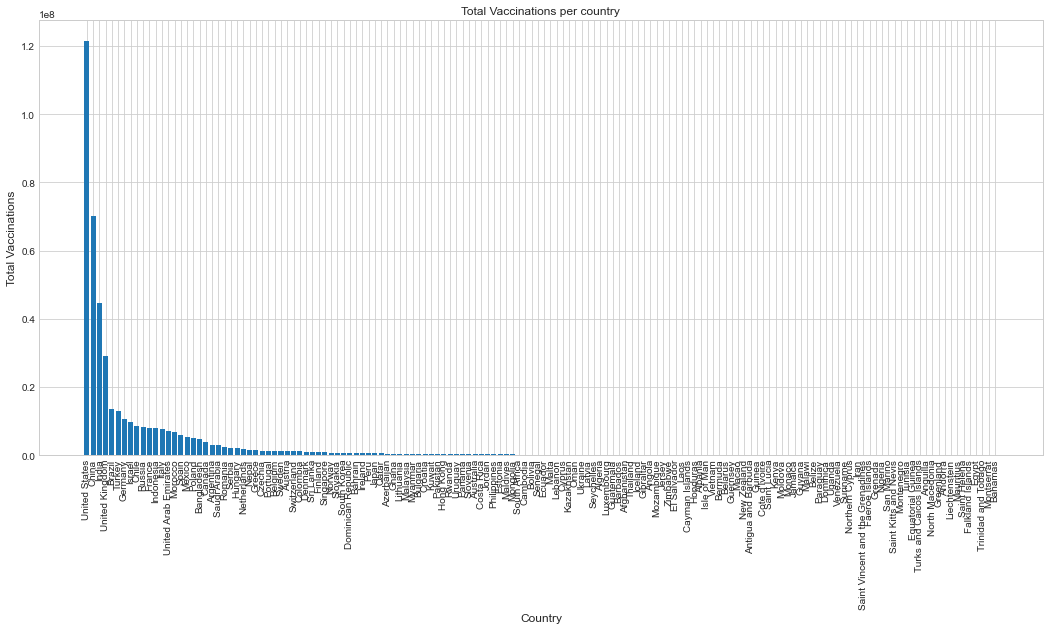

In [210]:
plt.figure(figsize=(18,8))
plt.bar(np.arange(len(total_vaccine_per_country_df2)), total_vaccine_per_country_df2["total_vaccinations"], align="center")

plt.xticks(np.arange(len(total_vaccine_per_country_df2)),total_vaccine_per_country_df2['country'])
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Total Vaccinations",fontsize=12)
plt.title("Total Vaccinations per country",fontsize=12)
# As I am printing all 150 countries data, X axis is not visible clearly. 
# Due to this, I have drawn top 20 countries details in next plot.

          country  total_vaccinations
0   United States         121441497.0
1           China          70000000.0
2           India          44603841.0
3  United Kingdom          28985958.0
4          Brazil          13479165.0


Text(0.5, 1.0, 'Total Vaccinations per country')

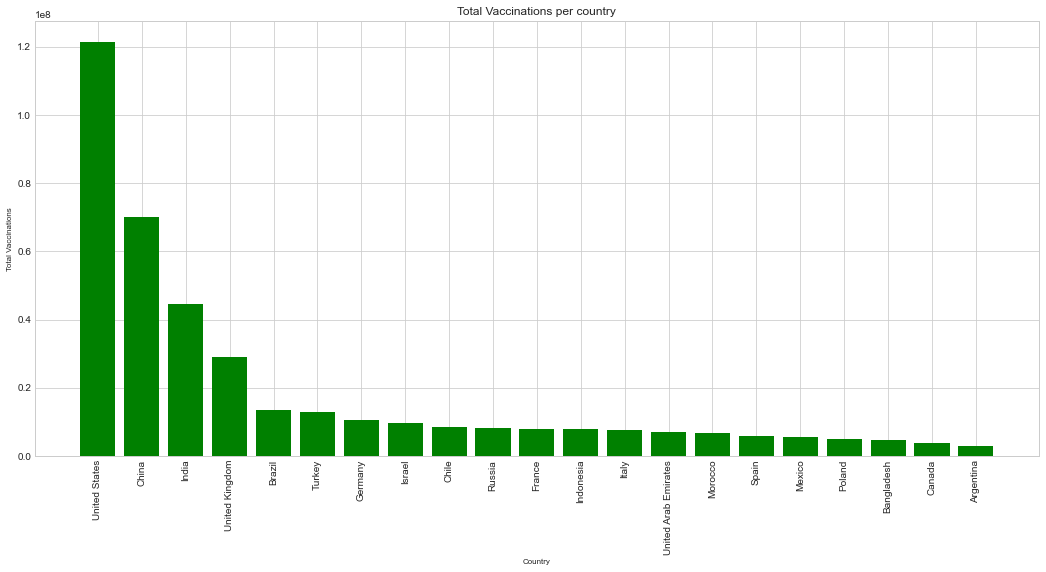

In [211]:

top_20_countries = total_vaccine_per_country_df2.iloc[0:21]
print(top_20_countries.head())

plt.figure(figsize=(18,8))
plt.bar(np.arange(len(top_20_countries)), top_20_countries["total_vaccinations"], align="center", color="green")
plt.xticks(np.arange(len(top_20_countries)),top_20_countries['country'])
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=8)
plt.ylabel("Total Vaccinations",fontsize=8)
plt.title("Total Vaccinations per country",fontsize=12)

In [212]:
# View the number of people who have received the vaccine, either completely or partially.
# The data is sorted in descending order based on the number of people who are fully vaccinated.
people_vaccinated1 = vaccine_df.groupby(['country'])['people_vaccinated'].max().reset_index()
people_vaccinated_df2 = people_vaccinated1.sort_values(by='people_vaccinated', ascending = False, ignore_index = True).style.background_gradient(cmap = 'Blues')
people_vaccinated_df2

,country,people_vaccinated
0,United States,79367225.000000
1,India,37125187.000000
2,United Kingdom,26853407.000000
3,Brazil,10099070.000000
4,Turkey,8016078.000000
5,Germany,7227867.000000
6,France,5630671.000000
7,Chile,5596657.000000
8,Russia,5595893.000000
9,Indonesia,5533379.000000


                 country  people_vaccinated
0          United States         79367225.0
1                  India         37125187.0
2         United Kingdom         26853407.0
3                 Brazil         10099070.0
4                 Turkey          8016078.0
5                Germany          7227867.0
6                 France          5630671.0
7                  Chile          5596657.0
8                 Russia          5595893.0
9              Indonesia          5533379.0
10                 Italy          5265495.0
11                Israel          5162636.0
12                Mexico          4763347.0
13            Bangladesh          4760747.0
14               Morocco          4264168.0
15                 Spain          4106550.0
16  United Arab Emirates          3480415.0
17                Canada          3236471.0
18                Poland          3213724.0
19             Argentina          2472426.0


Text(0.5, 1.0, 'People Vaccinated per country')

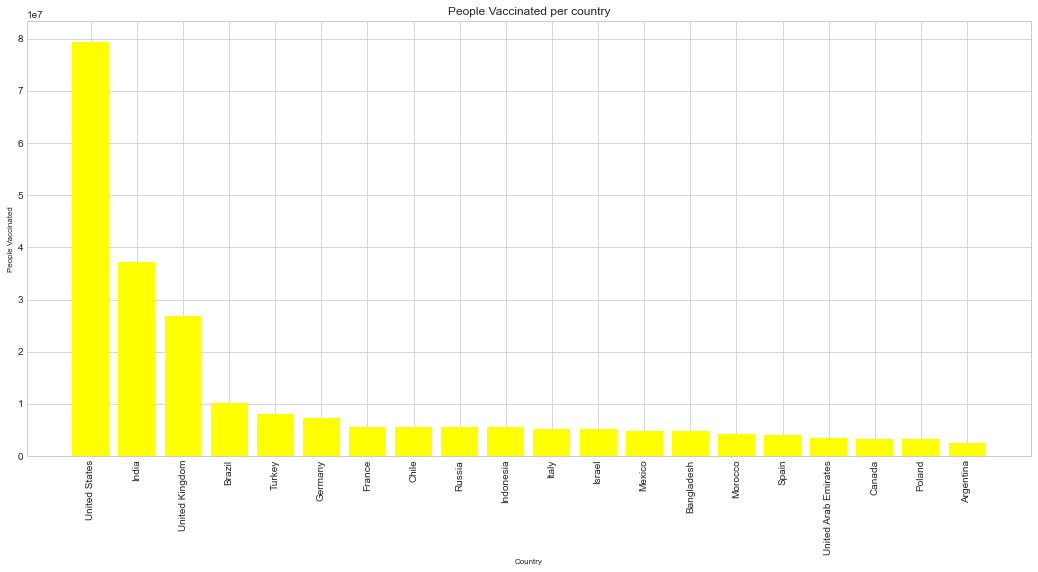

In [213]:
# new_df = people_vaccinated_df2.iloc[0:21]
# Finding the people_vaccinated for each country and display them in descending order.

people_vaccinated2 = vaccine_df.groupby(['country'])['people_vaccinated'].max().reset_index()
people_vaccinated2_df2 = people_vaccinated2.sort_values(by='people_vaccinated', ascending = False, ignore_index = True)
#people_vaccinated2_df2
new_df = people_vaccinated2_df2.iloc[:20]
print(new_df)
plt.figure(figsize=(18,8))
plt.bar(np.arange(len(new_df)), new_df["people_vaccinated"], align="center", color="yellow")
plt.xticks(np.arange(len(new_df)),new_df['country'])
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=8)
plt.ylabel("People Vaccinated",fontsize=8)
plt.title("People Vaccinated per country",fontsize=12)

In [214]:
# Which country is using what vaccine/s?
country_by_vaccine = pd.DataFrame(vaccine_df.groupby('country').vaccines.unique())
print(country_by_vaccine)

                                                  vaccines
country                                                   
Afghanistan                           [Oxford/AstraZeneca]
Albania                                  [Pfizer/BioNTech]
Algeria                                        [Sputnik V]
Andorra                                  [Pfizer/BioNTech]
Angola                                [Oxford/AstraZeneca]
...                                                    ...
United States  [Johnson&Johnson, Moderna, Pfizer/BioNTech]
Uruguay                         [Pfizer/BioNTech, Sinovac]
Venezuela                                      [Sputnik V]
Vietnam                               [Oxford/AstraZeneca]
Zimbabwe                               [Sinopharm/Beijing]

[146 rows x 1 columns]


In [215]:
# Getting the details of total vaccinations available and people vaccinated details for all countries
print(total_vaccine_per_country_df2.head())
print(people_vaccinated2_df2.head())
merged_df = pd.merge(total_vaccine_per_country_df2, people_vaccinated2_df2, on = "country", how = "inner") 
print(merged_df.head())
print(merged_df.shape)

          country  total_vaccinations
0   United States         121441497.0
1           China          70000000.0
2           India          44603841.0
3  United Kingdom          28985958.0
4          Brazil          13479165.0
          country  people_vaccinated
0   United States         79367225.0
1           India         37125187.0
2  United Kingdom         26853407.0
3          Brazil         10099070.0
4          Turkey          8016078.0
          country  total_vaccinations  people_vaccinated
0   United States         121441497.0         79367225.0
1           China          70000000.0                NaN
2           India          44603841.0         37125187.0
3  United Kingdom          28985958.0         26853407.0
4          Brazil          13479165.0         10099070.0
(146, 3)


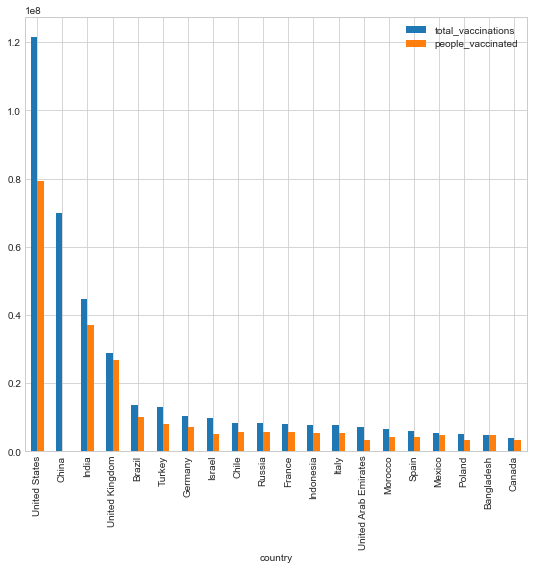

In [216]:
# Plotting total vaccinations vs people vaccinated.
merged_20 = merged_df.iloc[:20]
merged_20.plot(x="country", y=["total_vaccinations", "people_vaccinated"], kind="bar",figsize=(9,8))
plt.show()

Based on above picture, we can see that in most countries, all vaccines are not being used. And also as there is no people_vaccined data for China, hence there is no data ploted for that specific country in the above plot.

In [217]:
# Daily vaccinations of countries to see the progress

# Slice the original dataset to get the 'date', country', and 'daily_vaccinations' in a single dataframe.

df9 = vaccine_df[["date", "country", "daily_vaccinations"]]
df9.head(10)

,date,country,daily_vaccinations
0,2021-02-22,Afghanistan,NaN
1,2021-02-23,Afghanistan,1367.0
2,2021-02-24,Afghanistan,1367.0
3,2021-02-25,Afghanistan,1367.0
4,2021-02-26,Afghanistan,1367.0
5,2021-02-27,Afghanistan,1367.0
6,2021-02-28,Afghanistan,1367.0
7,2021-03-01,Afghanistan,1580.0
8,2021-03-02,Afghanistan,1794.0
9,2021-03-03,Afghanistan,2008.0


In [218]:
# Collecting only US data
df_us = df9.loc[df9['country'] == "United States"]
df_us

,date,country,daily_vaccinations
7218,2020-12-20,United States,NaN
7219,2020-12-21,United States,57909.0
7220,2020-12-22,United States,127432.0
7221,2020-12-23,United States,150606.0
7222,2020-12-24,United States,191001.0
...,...,...,...
7304,2021-03-16,United States,2435037.0
7305,2021-03-17,United States,2473762.0
7306,2021-03-18,United States,2503731.0
7307,2021-03-19,United States,2455116.0


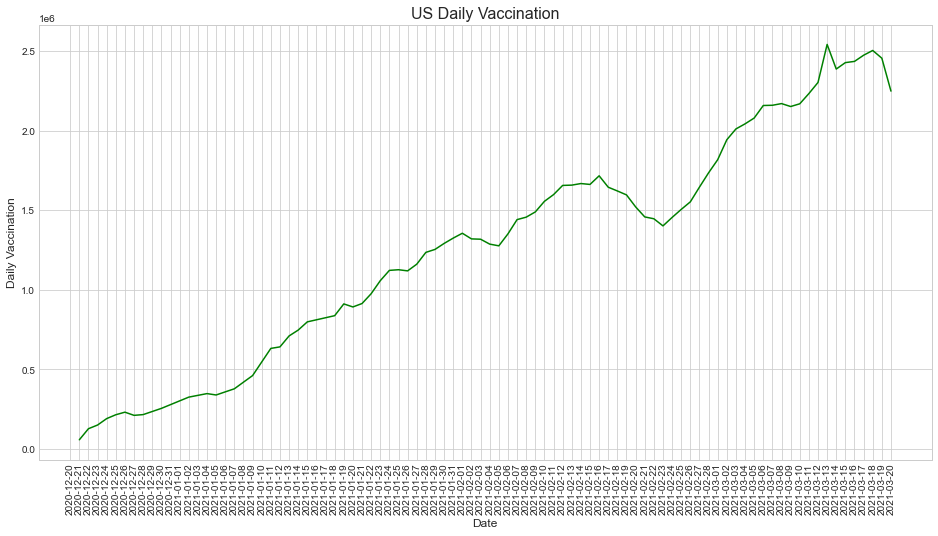

In [219]:
# Plotting only US data
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')
plt.plot(df_us.date,df_us[['daily_vaccinations']], color='green')
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Daily Vaccination",fontsize=12)
plt.title("US Daily Vaccination",fontsize=16)
plt.show()

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Bermuda' 'Bolivia' 'Brazil' 'Bulgaria' 'Cambodia' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Estonia'
 'Faeroe Islands' 'Falkland Islands' 'Finland' 'France' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guernsey'
 'Guinea' 'Guyana' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Laos' 'Latvia'
 'Lebanon' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao' 'Malawi'
 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Mexico' 'Moldova' 'Monaco'
 'Mongolia' 'Montenegro' '

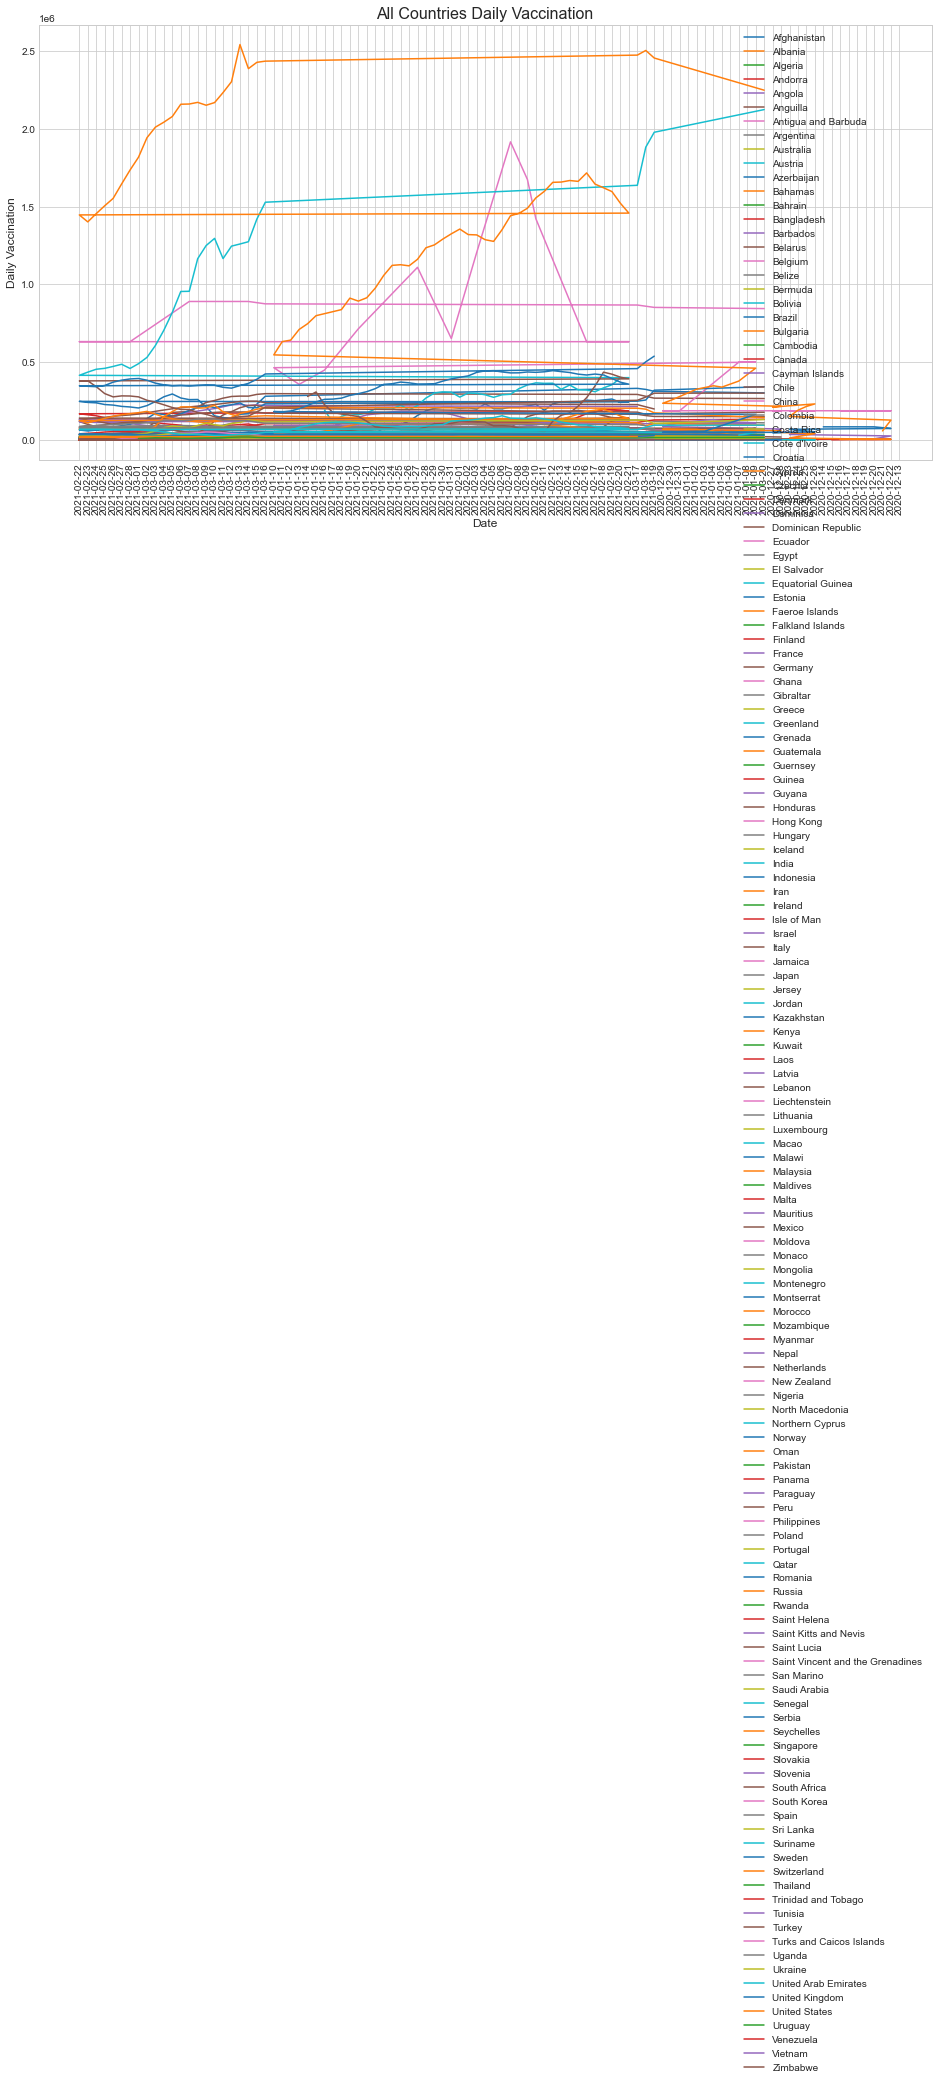

In [220]:
# Plotting all countries daily vaccinations

# daily_vac_20_countries = df9.head(10)
CList = df9['country'].unique()
print(CList)

plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

for ele in CList:
    c_data = df9.loc[df9['country'] == ele]
    plt.plot(c_data.date,c_data[['daily_vaccinations']])

plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Daily Vaccination",fontsize=12)
plt.title("All Countries Daily Vaccination",fontsize=16)

plt.legend(CList)

plt.show()   


As we are plotting all 146 countries the legend is so lengthy.
Here I am not plotting for only few countries. I am using that logic for some other tasks that I am trying to solve in this project

In [221]:
# Finding the correlation
correlation = vaccine_df.corr()
print(correlation)

                                     total_vaccinations  people_vaccinated  \
total_vaccinations                             1.000000           0.992070   
people_vaccinated                              0.992070           1.000000   
people_fully_vaccinated                        0.959749           0.917103   
daily_vaccinations_raw                         0.886558           0.900397   
daily_vaccinations                             0.942696           0.959780   
total_vaccinations_per_hundred                 0.166787           0.156857   
people_vaccinated_per_hundred                  0.176547           0.177684   
people_fully_vaccinated_per_hundred            0.089048           0.062801   
daily_vaccinations_per_million                 0.109883           0.109422   

                                     people_fully_vaccinated  \
total_vaccinations                                  0.959749   
people_vaccinated                                   0.917103   
people_fully_vaccinated    

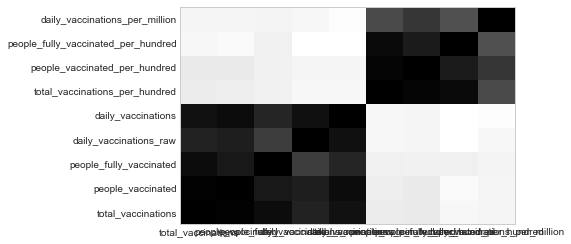

In [222]:

plt.pcolor(correlation)
plt.yticks(np.arange(0.5, len(correlation.index), 1), correlation.index)
plt.xticks(np.arange(0.5, len(correlation.columns), 1), correlation.columns)
plt.show()

<AxesSubplot:>

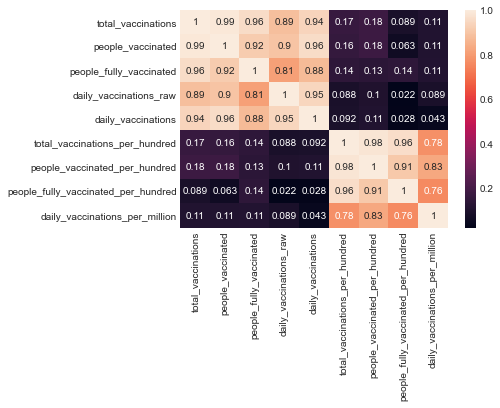

In [223]:
# Heat map using seaborn heatmap

import seaborn as sns
sns.heatmap(correlation, annot=True)

##People fully vaccinated - top 5 countries

In [224]:
#People fully vaccinated - top 5 countries
fully_vaccinated = vaccine_df.groupby('iso_code', as_index = False).people_fully_vaccinated.max()
fully_vaccinated_sort_top5 = fully_vaccinated.sort_values(by = 'people_fully_vaccinated', ascending = False).head()
print(fully_vaccinated_sort_top5.shape)
print(fully_vaccinated_sort_top5)

(5, 2)
    iso_code  people_fully_vaccinated
140      USA               43036818.0
62       IND                7478654.0
136      TUR                5013676.0
66       ISR                4523828.0
20       BRA                3380095.0


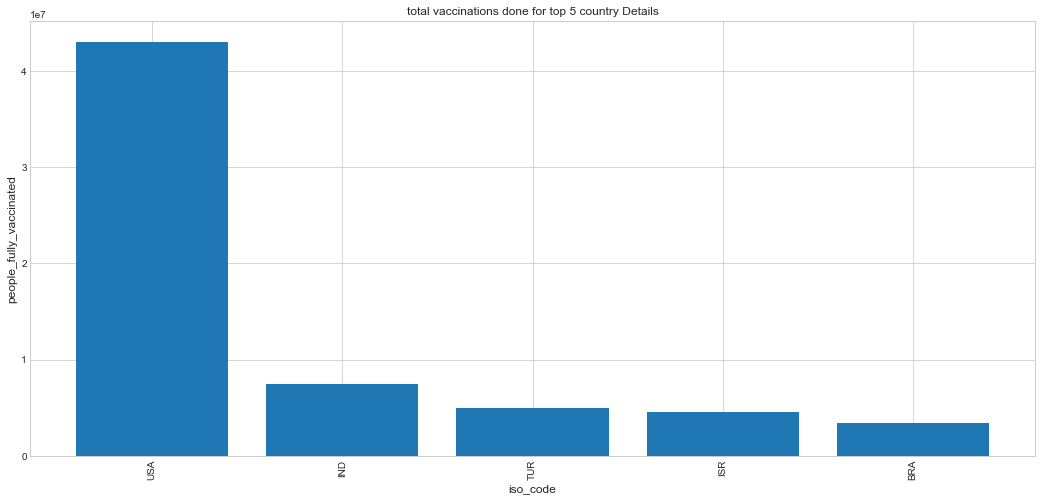

In [225]:
# Ploting a bar chart of fully vacinated people from top 5 countries

plt.figure(figsize=(18,8))
plt.bar(np.arange(len(fully_vaccinated_sort_top5)), fully_vaccinated_sort_top5["people_fully_vaccinated"], align="center")
plt.xticks(np.arange(len(fully_vaccinated_sort_top5)),fully_vaccinated_sort_top5['iso_code'])
plt.xticks(rotation=90)
plt.xlabel("iso_code",fontsize=12)
plt.ylabel("people_fully_vaccinated",fontsize=12)
plt.title("total vaccinations done for top 5 country Details",fontsize=12)
plt.show()

In [226]:
fully_vaccinated_sort = fully_vaccinated.sort_values(by = 'people_fully_vaccinated', ascending = False)
print(fully_vaccinated_sort.shape)
print(fully_vaccinated_sort)

(146, 2)
    iso_code  people_fully_vaccinated
140      USA               43036818.0
62       IND                7478654.0
136      TUR                5013676.0
66       ISR                4523828.0
20       BRA                3380095.0
..       ...                      ...
139      URY                      NaN
141      VCT                      NaN
142      VEN                      NaN
143      VNM                      NaN
145      ZWE                      NaN

[146 rows x 2 columns]


In [227]:
# Dropping NaN values from the fully vaccinated data frame
fully_vaccinated_sort = fully_vaccinated_sort.dropna()
fully_vaccinated_sort

,iso_code,people_fully_vaccinated
140,USA,43036818.0
62,IND,7478654.0
136,TUR,5013676.0
66,ISR,4523828.0
20,BRA,3380095.0
...,...,...
95,MNE,461.0
76,KOR,313.0
98,MSR,40.0
125,SMR,35.0


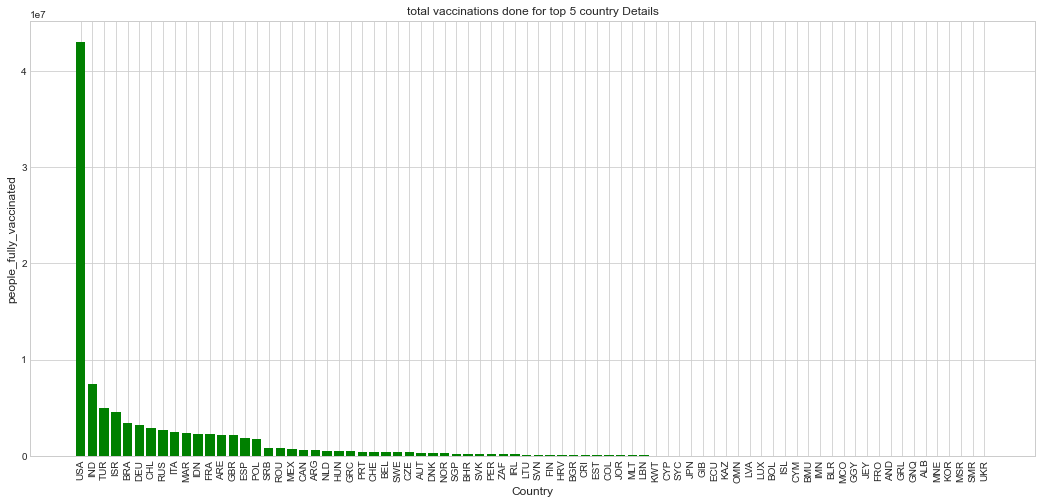

In [228]:
# Ploting a bar chart of fully vacinated people from all countries
plt.figure(figsize=(18,8))
plt.bar(np.arange(len(fully_vaccinated_sort)), fully_vaccinated_sort["people_fully_vaccinated"], align="center", color="green")
plt.xticks(np.arange(len(fully_vaccinated_sort)),fully_vaccinated_sort['iso_code'])
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=12)
plt.ylabel("people_fully_vaccinated",fontsize=12)
plt.title("total vaccinations done for top 5 country Details",fontsize=12)
# plt.legend(Gender,loc=2)
plt.show()

In [229]:
# What country is vaccinated a larger percent from its population?
# all the paramters are based on total vaccinations, people vaccinated so lets drop those which are null
people_vacc_df = vaccine_df[['country', 'total_vaccinations_per_hundred']]
people_vacc_df.head()

,country,total_vaccinations_per_hundred
0,Afghanistan,0.0
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN


In [230]:
#  mean of all the values of total_vaccinations_per_hundred for each country
# total vaccinations will not be a good measure as US, UK has greater value of it but their population size is also higher
people_vacc_grouped = people_vacc_df.groupby("country").mean()
print(people_vacc_grouped.head())
# people_vacc_grouped.tail()

             total_vaccinations_per_hundred
country                                    
Afghanistan                        0.053333
Albania                            0.211739
Algeria                            0.056667
Andorra                            2.891111
Angola                             0.056667


In [231]:
# Sorting the data based on total_vaccinations_per_hundred from higher to lower
people_vacc_grouped.sort_values(by="total_vaccinations_per_hundred", ascending=False, inplace=True)
print(people_vacc_grouped.head())
people_vacc_grouped

                      total_vaccinations_per_hundred
country                                             
Gibraltar                                  77.281791
Israel                                     57.207935
Seychelles                                 48.775897
United Arab Emirates                       43.226533
Cayman Islands                             32.572941


,total_vaccinations_per_hundred
country,
Gibraltar,77.281791
Israel,57.207935
Seychelles,48.775897
United Arab Emirates,43.226533
Cayman Islands,32.572941
...,...
Vietnam,0.011538
Uganda,0.008750
Iran,0.003333


(21, 1)
                total_vaccinations_per_hundred
country                                       
Serbia                               16.161875
Bahrain                              15.795278
United States                        14.635584
Faeroe Islands                       14.293125
Malta                                14.176613


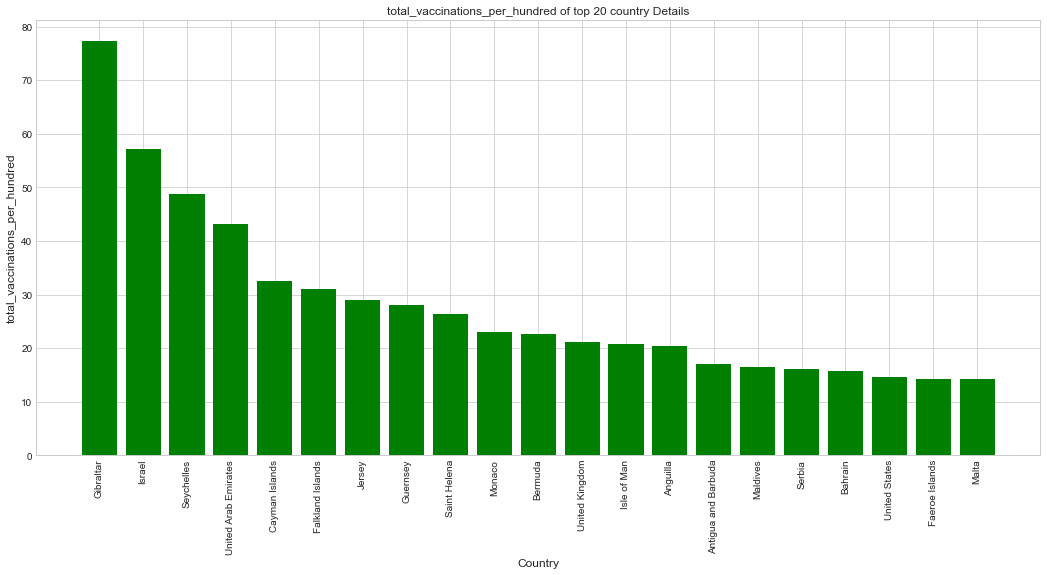

In [232]:
# Based on above data We can observe that Israel, UAE, etc. have a higher ratio of total vaccinations 
# per hundred as compared to USA, UK, China
# total_vaccinations_per_hundred

people_vacc_grouped_20 = people_vacc_grouped.iloc[:21]
print(people_vacc_grouped_20.shape)
print(people_vacc_grouped_20.tail())

plt.figure(figsize=(18,8))
plt.bar(np.arange(len(people_vacc_grouped_20)), people_vacc_grouped_20["total_vaccinations_per_hundred"], align="center", color="green")
plt.xticks(np.arange(len(people_vacc_grouped_20)),people_vacc_grouped_20.index)
plt.xticks(rotation=90)
plt.xlabel("Country",fontsize=12)
plt.ylabel("total_vaccinations_per_hundred",fontsize=12)
plt.title("total_vaccinations_per_hundred of top 20 country Details",fontsize=12)
# plt.legend(Gender,loc=2)
plt.show()

In [233]:
# Finding the distribuation of each vaccine

vaccine_df['vaccines'].value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1813
Pfizer/BioNTech                                                                       1290
Oxford/AstraZeneca                                                                     883
Oxford/AstraZeneca, Pfizer/BioNTech                                                    582
Moderna, Pfizer/BioNTech                                                               385
Sputnik V                                                                              278
Sinovac                                                                                211
Pfizer/BioNTech, Sinovac                                                               204
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      160
Sinopharm/Beijing                                                                      145
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V                                       123

We find that the 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech' combination has the highest number of doses, while 'Moderna, Oxford/AstraZeneca' has the least number of doses.

This should imply that the 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech' combination is used in the most number of countries

With all this data analysis, I could able to show the data analysis and visualzation of covid-19 vaccination progress and show the work to achive my work related to initial objectives of this project as given below

I want to showcase the daily covid-19 vaccination progress across all countries for the data available in a plot for easy understanding of trends for all countries using line plots. --- Done

I want to provide a chart with the details of total vaccinations done for each country for all the data available and also provide details about how many people in each country are vaccinated per million to see how fast the vaccination is progressing across countries ---Done

I want to find if all the vaccinations available are used on the same day by comparing vaccination available vs people vaccinated using fields “total_vaccinations” and “people_vaccinated” per day.  ---- Done

 I want to find what vaccines are used in each country and also want to find which vaccine is more distributed across the world to see the production capability of the companies for these vaccines. ---Done
